## Get going by asking the following questions and looking for the answers with some code and plots:

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

demographics = pd.read_csv('demographics.csv')
demographics2 = pd.read_csv('demographics2.csv').set_index('Country')
demographics2 = demographics2.iloc[:, 1:]
demographics2.head()

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
Country,,,,,,,,,,
Albania,3.02,98.712978,88.0,1011.752695,49.504318,24.751387,1.9,19.7,11.8,11.5
Algeria,2.30,59.752193,90.4,1625.140989,67.995227,50.424490,6.2,12.4,9.0,5.7
Angola,1.70,67.405416,38.4,318.739949,33.129091,12.275108,10.3,190.9,19.8,2.3
Antigua and Barbuda,0.70,98.950000,98.0,7874.822798,98.443182,259.996606,3.5,66.8,11.9,7.4
Belarus,2.70,98.737052,98.0,1196.023043,100.526923,64.079201,2.5,21.6,26.9,26.5


## Can you count something interesting?

In [4]:
demographics['percent'] = demographics['health_avg'] / demographics['GDP_avg'] * 100
high_per = demographics[demographics['percent'] > 7]
high_per['Country'].count()
print(high_per['Country'])

6     Bangladesh
20      Colombia
34        Greece
39       Hungary
42        Israel
43         Italy
58         Malta
75      Portugal
81    Seychelles
82      Slovenia
84         Spain
Name: Country, dtype: object


### From 2004 and before, 11 out of 106 countries spent more than 7% of their average GDP on healthcare



## Can you compare two related quantities?

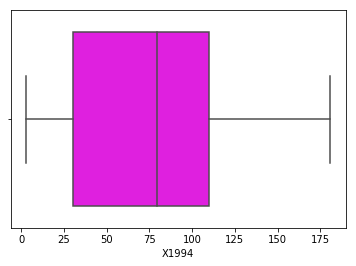

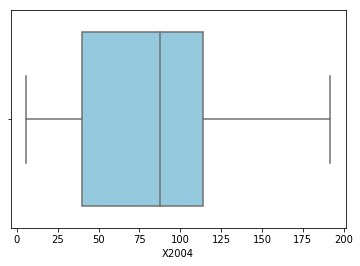

In [5]:
sugar = pd.read_csv('sugar_consumption.csv')
sugar.rename(columns = {'NA.':'Country'}, inplace = True)
sugar.dropna(how='all', subset = list(sugar.columns)[1:], inplace=True)
sugar_time = sugar.loc[:, ['Country', 'X1994', 'X2004']]
sugar_time.set_index('Country')
sugar_time['percent_change'] = (sugar_time['X2004'] / sugar_time['X1994'] * 100) - 100

sns.boxplot(x=sugar_time["X1994"], color="magenta")
plt.show()

sns.boxplot(x=sugar_time["X2004"], color="skyblue")
plt.show()


### The distribution of sugar consumption across the globe has stayed relatively similar, with consumption increasing overall slightly

## Can you find trends?

In [6]:
GDP = pd.read_csv('gdp.csv')
GDP.rename(index = str, columns={'Income.per.person..fixed.2000.US..':'Country'}, inplace=True)
GDP.dropna(how="all", subset = list(GDP.columns)[1:], inplace=True)
GDP_time = GDP.loc[:, ['Country', 'X1994', 'X2004']]
GDP_time['percent_change'] = (GDP_time['X2004'] / GDP_time['X1994'] * 100) - 100
GDP_time.dropna(inplace = True)
GDP_time.describe()

,X1994,X2004,percent_change
count,183.000000,183.000000,183.000000
mean,6437.097612,8161.158184,34.798105
std,10472.574589,13105.586325,80.436946
min,58.459932,88.243053,-28.661305
25%,485.771265,599.853707,12.495180
50%,1676.305198,2159.529606,23.396576
75%,7659.506226,9363.679014,40.427192
max,69311.894852,80255.753889,991.033315


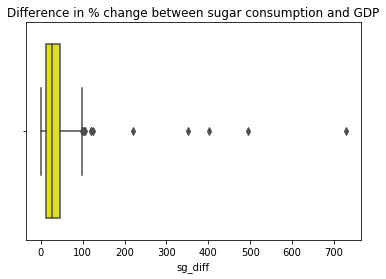

,X1994_x,X2004_x,sugar_change,X1994_y,X2004_y,GDP_change,sg_diff
count,150.000000,151.000000,150.000000,151.000000,151.000000,151.000000,150.000000
mean,75.854667,81.412252,31.363424,5391.630157,6701.451181,29.618130,45.738801
std,45.430497,44.802196,100.472492,8611.541291,10704.281463,40.273159,83.965294
min,2.740000,5.480000,-55.555556,58.459932,88.243053,-28.661305,0.527297
25%,30.140000,39.730000,-6.158550,416.929823,531.227093,12.107491,11.941531
50%,79.450000,87.670000,6.858084,1377.683470,1766.301257,21.727053,26.398665
75%,109.590000,112.330000,33.333333,4970.588526,6113.148880,40.427192,46.596945
max,180.820000,191.780000,800.000000,43153.553109,61227.967473,355.385019,727.906560


In [7]:
both = sugar_time.merge(GDP_time, on= 'Country')
both.rename(columns = {'percent_change_x':'sugar_change'}, inplace = True)
both.rename(columns = {'percent_change_y':'GDP_change'}, inplace = True)
both['sg_diff'] = abs(both['sugar_change'] - both['GDP_change'])
sns.boxplot(x=both["sg_diff"], color="yellow").set_title("Difference in % change between sugar consumption and GDP")
plt.show()

display(both.describe())

### The overall growth worldwide of sugar consumption and GDP are very similar except for a few outliers where GDP skrocketed while sugar consumption did not.

## Can you make a scatter plot?

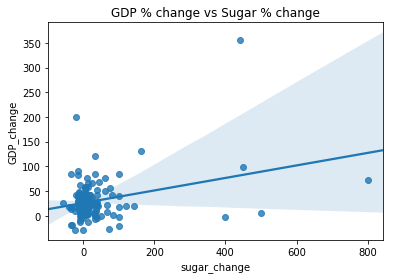

In [8]:
sns.regplot(x='sugar_change', y='GDP_change', data=both)
plt.title('GDP % change vs Sugar % change')
plt.show()


## Can you make a bar plot?

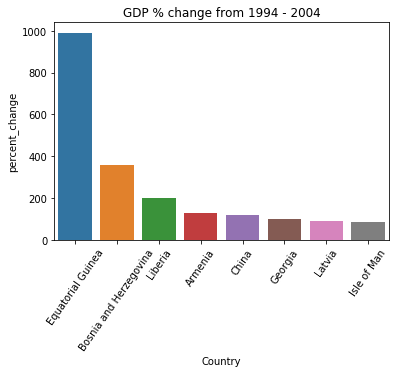

In [9]:
g = GDP_time.sort_values('percent_change', ascending = False).head(8)

sns.barplot(x="Country", y="percent_change", data=g)
plt.xticks(rotation = 55)
plt.title("GDP % change from 1994 - 2004")
plt.show()


### Equatorial Guinea had a 991% increase from 1994 to 2004, let's look into that

## Can you make a time-series plot?

/Users/silasneptune/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


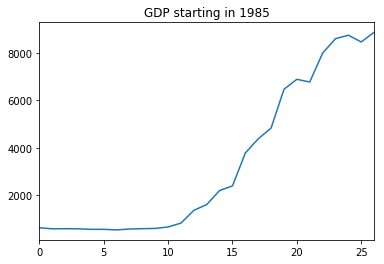

In [10]:
egr = pd.read_csv('gdp.csv', index_col = 0)
egr = egr.T
eg = egr['Equatorial Guinea']
eg.dropna(inplace = True)

sns.tsplot(data=eg)
plt.title('GDP starting in 1985')
plt.show()

### Starting in 1985, Equitorial Guinea's GDP has been on the rise. While the 1000% increase looked like it could have been a mistake, the data seems to support it being accurate.

## Takeaways:

### Sugar consumption and GDP both increased globally with a correlation of 0.763991 and with similar distributions. After 1995, some countries shot up in GDP and sugar consumption but this seems to be accurate data. I do not think you could very accurately predict one variable using the other, but given more demographics of each country hopefully this will be possible.

## Spearman Correlations

In [11]:
demographics2.corr(method = 'spearman')

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
badteeth,1.000000,0.364825,0.449172,0.360993,0.362374,0.358994,-0.395941,-0.353555,0.162668,0.378980
literacy_avg,0.364825,1.000000,0.638173,0.605205,0.503942,0.615448,-0.596178,-0.545323,0.163762,0.423965
water_avg,0.449172,0.638173,1.000000,0.829930,0.700498,0.798649,-0.590855,-0.743762,0.176651,0.548392
GDP_avg,0.360993,0.605205,0.829930,1.000000,0.809499,0.939959,-0.576764,-0.564950,0.257639,0.611072
sugar_avg,0.362374,0.503942,0.700498,0.809499,1.000000,0.767377,-0.492339,-0.413712,0.283775,0.611904
health_avg,0.358994,0.615448,0.798649,0.939959,0.767377,1.000000,-0.578471,-0.554365,0.289508,0.626703
Low_BMI,-0.395941,-0.596178,-0.590855,-0.576764,-0.492339,-0.578471,1.000000,0.386851,-0.140166,-0.498378
Adolescent birth rate,-0.353555,-0.545323,-0.743762,-0.564950,-0.413712,-0.554365,0.386851,1.000000,-0.013532,-0.328774
Tobacco_Use,0.162668,0.163762,0.176651,0.257639,0.283775,0.289508,-0.140166,-0.013532,1.000000,0.663753
Smokers,0.378980,0.423965,0.548392,0.611072,0.611904,0.626703,-0.498378,-0.328774,0.663753,1.000000


## Distributions of each variable

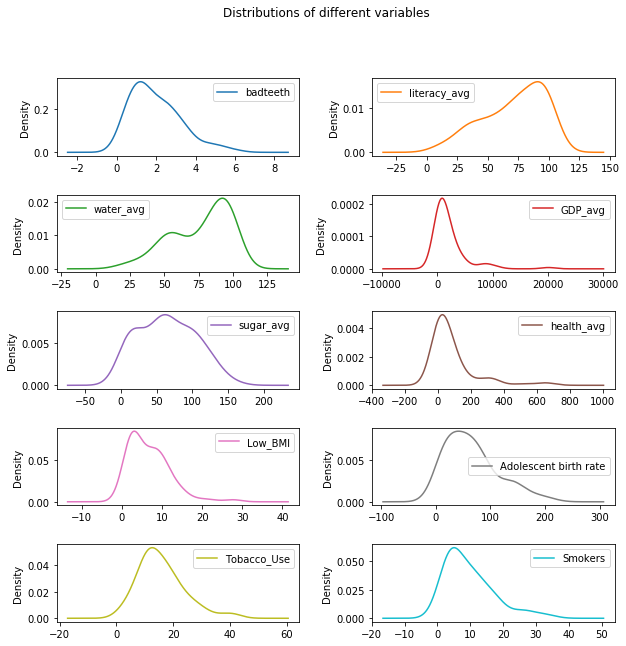

In [12]:
demographics2.plot(kind='density', subplots=True, layout=(5,2), sharex=False, figsize=(10, 10), title= 'Distributions of different variables')
plt.subplots_adjust(wspace=.3, hspace=.5)
plt.show()

## Distribution Descriptions of each Variable

In [14]:
demographics2.describe()

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,1.980769,71.209997,76.176923,2066.672359,64.343618,85.365049,6.794872,65.862821,15.834615,9.725641
std,1.254532,25.017850,21.353888,3085.329909,39.388022,135.642289,5.098380,47.866213,8.102875,7.439495
min,0.300000,9.391331,19.800000,124.949106,2.677727,1.930402,0.200000,4.200000,2.200000,0.200000
25%,1.062500,53.674316,56.850000,339.177720,31.361503,7.437916,2.650000,28.325000,10.900000,4.425000
50%,1.625000,77.373622,81.200000,1027.550319,63.697727,28.286457,6.300000,57.000000,14.600000,7.600000
75%,2.700000,94.933728,94.250000,2634.188597,96.263636,96.897977,9.750000,90.250000,19.775000,13.600000
max,5.900000,99.652349,100.000000,20102.283588,156.538636,670.558719,27.700000,206.000000,41.000000,33.800000


## 5 Countries with the most children with low BMI

In [15]:
demographics2.sort_values('Low_BMI').tail()

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
Country,,,,,,,,,,
Maldives,2.10,92.640251,91.0,2101.562441,85.988636,80.766002,14.6,13.7,11.2,4.3
Sri Lanka,1.40,88.730338,79.0,492.653218,57.659545,14.120333,15.4,20.3,10.5,1.5
Nepal,0.50,34.052744,80.8,164.985488,5.915909,2.569341,18.2,71.0,20.4,3.1
Pakistan,1.38,34.212251,89.0,361.504004,78.516136,3.485464,21.7,44.0,10.7,3.3
India,3.94,50.000074,81.2,274.191693,56.663636,4.771110,27.7,28.1,14.6,4.4


## 5 Countries with the highest tobacco use

In [37]:
demographics2.sort_values('Tobacco_Use').tail()

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
Country,,,,,,,,,,
Hungary,3.3,98.920513,100.0,3314.565760,114.571591,291.107193,2.1,19.8,30.5,23.6
Namibia,1.2,80.428933,77.2,2015.688112,85.552727,87.021767,14.2,82.0,31.1,11.9
Gambia,2.3,36.817727,74.8,578.521510,64.198182,6.402174,9.6,88.0,36.1,10.8
Latvia,3.4,99.599435,98.0,2912.917477,97.365385,107.547090,2.6,15.3,40.5,31.5
Samoa,2.5,97.944330,93.0,1244.206146,65.127500,58.055128,0.2,44.0,41.0,33.8


## 5 Countries with the highest youth smoking rate

In [38]:
demographics2.sort_values('Smokers').tail()

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
Country,,,,,,,,,,
Belarus,2.7,98.737052,98.0,1196.023043,100.526923,64.079201,2.5,21.6,26.9,26.5
Chile,3.4,93.712055,96.2,2870.514654,105.604545,151.578895,1.0,51.5,7.3,26.7
Croatia,3.5,97.424113,99.0,4631.581570,132.983077,317.046509,1.9,11.8,28.6,27.2
Latvia,3.4,99.599435,98.0,2912.917477,97.365385,107.547090,2.6,15.3,40.5,31.5
Samoa,2.5,97.944330,93.0,1244.206146,65.127500,58.055128,0.2,44.0,41.0,33.8


## 18 Countries with the highest adolescent birth rates

In [44]:
demographics2.sort_values('Adolescent birth rate').tail(18)

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
Country,,,,,,,,,,
Nicaragua,1.50,76.677126,81.0,1306.878112,109.154091,29.813334,2.1,92.0,25.1,21.2
Lesotho,0.40,86.254435,67.0,263.456704,43.652045,15.197218,10.2,94.0,24.8,10.1
Benin,0.80,26.128631,61.0,299.689409,8.469091,8.155448,9.1,94.0,4.0,2.8
Kenya,1.35,82.229075,48.0,378.318230,49.940455,7.873519,8.8,96.0,9.9,4.9
Cameroon,1.50,54.812685,56.6,589.192338,14.945455,6.689614,7.2,119.0,10.9,4.8
Zimbabwe,1.30,80.653373,70.2,494.133682,57.970909,27.343722,9.8,120.0,12.0,3.2
Nigeria,0.46,55.109967,49.2,346.074925,16.751364,8.628378,13.5,122.0,15.4,3.5
Burkina Faso,0.70,14.231366,47.4,160.369819,8.220000,5.087516,10.6,130.0,16.8,6.5
Guinea-Bissau,0.50,30.658008,55.0,172.195905,8.469091,4.025492,9.6,136.7,10.9,5.1


## Visualizing correlations of each variable to eachother

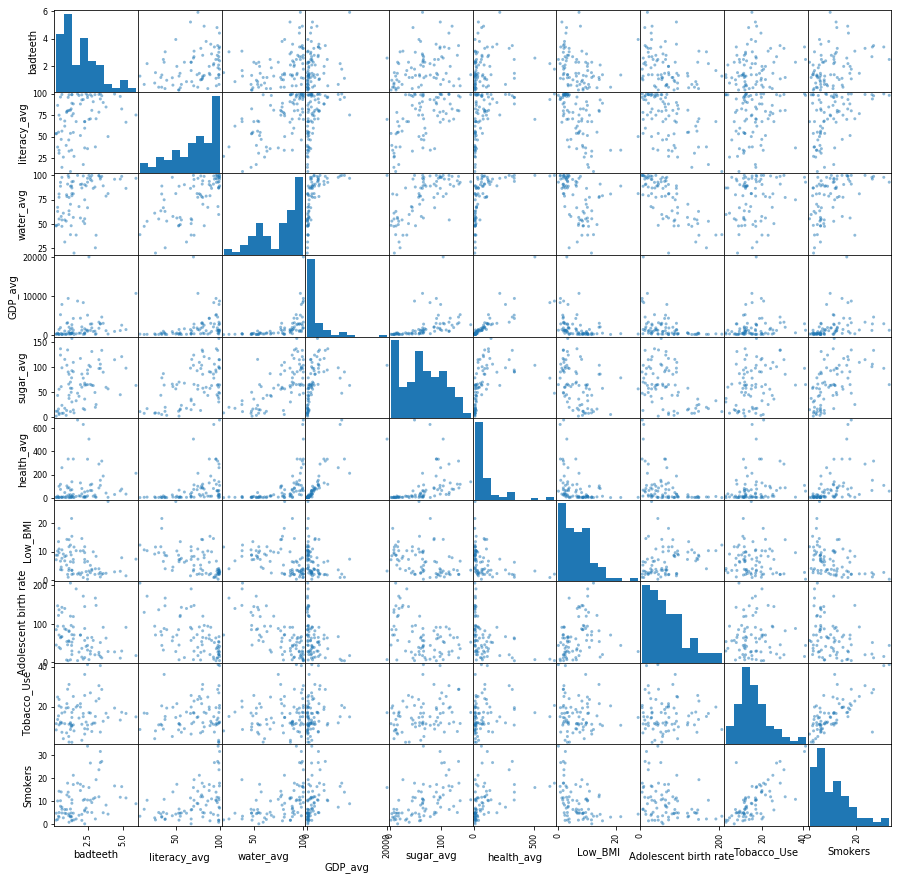

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(demographics2, figsize=(15, 15))
plt.show()

## T-test results between certain variables

In [20]:
stats.ttest_ind(demographics2['badteeth'], demographics2['sugar_avg'], equal_var = False)

Ttest_indResult(statistic=-13.976193148508369, pvalue=7.708348782540053e-23)

In [21]:
stats.ttest_ind(demographics2['badteeth'], demographics2['GDP_avg'], equal_var = False)

Ttest_indResult(statistic=-5.9101818650079716, pvalue=8.7939409244245e-08)

In [22]:
stats.ttest_ind(demographics2['badteeth'], demographics2['water_avg'], equal_var = False)

Ttest_indResult(statistic=-30.63398733251983, pvalue=4.5246014045971789e-45)

## Linear Regression plots between bad teeth and sugar consumption

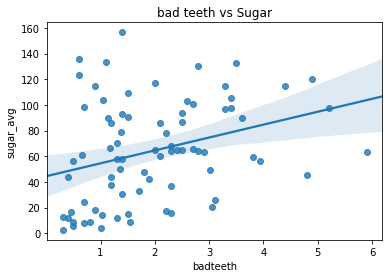

(0.32013695908969519, 0.0042721499141740024)

In [23]:
import scipy

sns.regplot(x='badteeth', y='sugar_avg', data=demographics2)
plt.title('bad teeth vs Sugar')
plt.show()

scipy.stats.pearsonr(demographics2['badteeth'], demographics2['sugar_avg'])

## Linear Regression plots between bad teeth and literacy rates

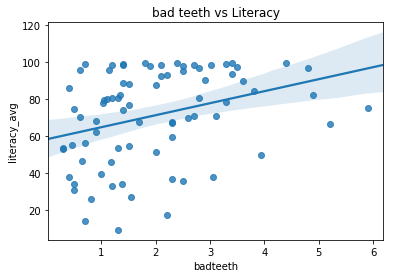

(0.3253716118743758, 0.0036520674494961206)

In [24]:
sns.regplot(x='badteeth', y='literacy_avg', data=demographics2)
plt.title('bad teeth vs Literacy')
plt.show()

scipy.stats.pearsonr(demographics2['badteeth'], demographics2['literacy_avg'])

## Linear Regression plots between bad teeth and youth smoking rate

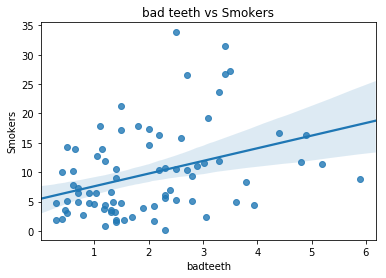

(0.36307422989896732, 0.0010866881236367583)

In [25]:
sns.regplot(x='badteeth', y='Smokers', data=demographics2)
plt.title('bad teeth vs Smokers')
plt.show()


scipy.stats.pearsonr(demographics2['badteeth'], demographics2['Smokers'])

## Linear Regression plots between bad teeth and Low BMI

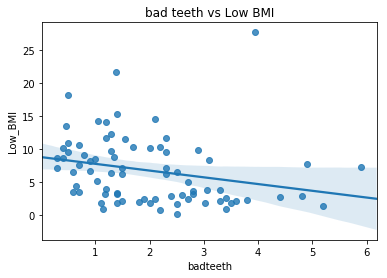

(-0.25127939756473583, 0.026476775887891355)

In [26]:
sns.regplot(x='badteeth', y='Low_BMI', data=demographics2)
plt.title('bad teeth vs Low BMI')
plt.show()


scipy.stats.pearsonr(demographics2['badteeth'], demographics2['Low_BMI'])

## Linear Regression plots between bad teeth and access to basic water sanitation

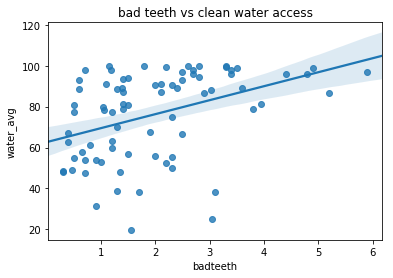

(0.40161907621101228, 0.00026796567458934543)

In [27]:
sns.regplot(x='badteeth', y='water_avg', data=demographics2)
plt.title('bad teeth vs clean water access')
plt.show()

scipy.stats.pearsonr(demographics2['badteeth'], demographics2['water_avg'])

## Linear Regression plots between bad teeth and GDP

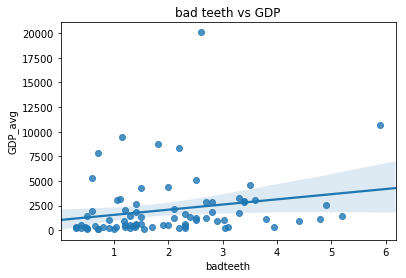

(0.21351816323506742, 0.060517539465079075)

In [46]:
sns.regplot(x='badteeth', y='GDP_avg', data=demographics2)
plt.title('bad teeth vs GDP')
plt.show()


scipy.stats.pearsonr(demographics2['badteeth'], demographics2['GDP_avg'])

## Countries with highest GDP

In [29]:
demographics2.sort_values('GDP_avg').tail(3)

,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg,Low_BMI,Adolescent birth rate,Tobacco_Use,Smokers
Country,,,,,,,,,,
Cyprus,1.14,95.583051,100.0,9424.547896,90.161136,334.533933,0.9,4.2,19.5,13.9
Saudi Arabia,5.90,75.086297,97.0,10724.992842,63.511591,212.081834,7.3,17.6,14.9,8.9
Kuwait,2.60,69.992105,100.0,20102.283588,103.362727,506.458186,3.1,7.1,17.0,15.9


## Linear Regression plots between bad teeth and Health Expenditure

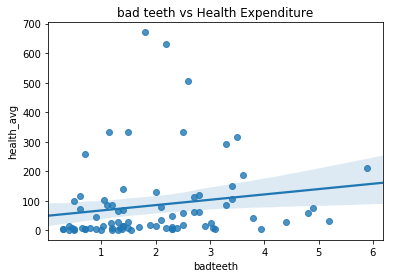

(0.16730696472946155, 0.14316651348487883)

In [30]:
sns.regplot(x='badteeth', y='health_avg', data=demographics2)
plt.title('bad teeth vs Health Expenditure')
plt.show()

scipy.stats.pearsonr(demographics2['badteeth'], demographics2['health_avg'])

## Linear Regression plots between bad teeth and adolescent birth rates

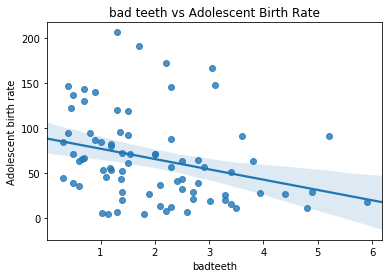

(-0.29939778173740761, 0.0077470422411609124)

In [31]:
sns.regplot(x='badteeth', y='Adolescent birth rate', data=demographics2)
plt.title('bad teeth vs Adolescent Birth Rate')
plt.show()

scipy.stats.pearsonr(demographics2['badteeth'], demographics2['Adolescent birth rate'])

## Linear Regression plots between bad teeth and Tobacco Use

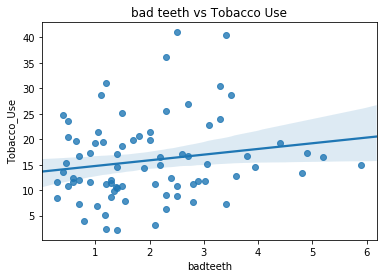

(0.17301241690719027, 0.12982739062291607)

In [32]:
sns.regplot(x='badteeth', y='Tobacco_Use', data=demographics2)
plt.title('bad teeth vs Tobacco Use')
plt.show()

scipy.stats.pearsonr(demographics2['badteeth'], demographics2['Tobacco_Use'])

## Distribution of bad teeth

In [33]:
demographics2.badteeth.describe()


count    78.000000
mean      1.980769
std       1.254532
min       0.300000
25%       1.062500
50%       1.625000
75%       2.700000
max       5.900000
Name: badteeth, dtype: float64

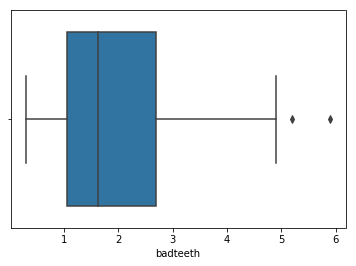

In [34]:
sns.boxplot(x=demographics2.badteeth)
plt.show()